List Operation 

In [4]:
pip install seaborn


[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np 

import datetime

import seaborn as sns 
import matplotlib.pyplot as plt 

In [10]:
movie = pd.read_csv("movies.csv")

rating = pd.read_csv("ratings.csv")

In [11]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [12]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
movie.shape

(9125, 3)

In [14]:
rating.shape

(100836, 4)

In [15]:
df = pd.merge(movie, rating, how = "inner", on = "movieId")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [16]:
data = df.drop(["movieId","userId", "timestamp"], axis = 1)

data = pd.pivot_table(data, index = ["title", "genres"], aggfunc="mean").reset_index()

data

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471
...,...,...,...
7067,eXistenZ (1999),Action|Sci-Fi|Thriller,3.863636
7068,xXx (2002),Action|Crime|Thriller,2.770833
7069,xXx: State of the Union (2005),Action|Crime|Thriller,2.000000
7070,¡Three Amigos! (1986),Comedy|Western,3.134615


/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_57343/1013924283.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["rating"], color = "blue")


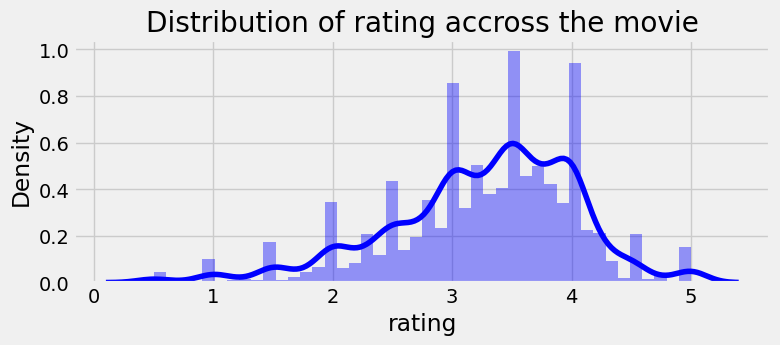

In [17]:
# Check the distribution of rating accross the movie 

plt.rcParams["figure.figsize"] = (8,3)

plt.style.use("fivethirtyeight")

sns.distplot(data["rating"], color = "blue")

plt.title("Distribution of rating accross the movie")

plt.show()

In [18]:
data['y'] = data['title'].str.split(' ')

data['year'] = data['y'].apply(lambda x: x[-1].strip('(').strip(')'))

data.drop('y', axis = 1, inplace = True)

data.sort_values('year', ascending= False, inplace=True)

data.head()

,title,genres,rating,year
3025,Hyena Road,(no genres listed),2.000000,Road
6268,The Shallows (2016),Drama|Thriller,2.500000,2016
3756,London Has Fallen (2016),Action|Crime|Thriller,2.000000,2016
2187,Finding Dory (2016),Adventure|Animation|Comedy,3.576923,2016
6249,The Neon Demon (2016),Drama|Horror|Mystery,3.000000,2016


In [19]:
#set option 

pd.set_option('display.max_rows', 110)

data['year'].value_counts()

year
2002    244
1996    240
1995    228
2001    227
1998    225
2000    225
1999    221
1997    217
2004    206
2006    204
1994    198
2003    197
2007    195
2005    195
2009    190
2008    189
2011    180
2010    179
2014    170
1993    166
2013    166
2012    160
2015    148
1988    133
1992    127
1987    123
1990    117
1989    115
1986    115
1991    111
1985    105
1984     77
1982     71
1983     67
1981     64
1980     63
2016     52
1979     48
1977     47
1978     46
1973     41
1974     39
1971     33
1962     32
1965     32
1975     32
1959     32
1955     32
1964     31
1976     31
1960     30
1972     30
1966     30
1963     29
1968     28
1967     28
1953     26
1957     26
1961     25
1958     24
1970     23
1969     22
1956     22
1954     20
1942     20
1939     20
1940     17
1947     17
1951     16
1950     16
1948     16
1946     16
1941     15
1949     15
1937     14
1945     13
1952     13
1944     12
1936     11
1938     10
1931      9
1933      8
1932      8

Need to clean the title without year after name 

In [20]:
data['year'] = data['year'].replace(("Road", ""), ("2015", "2011"))

#convert to int 
data['year'] = data['year'].astype(int)

data.head()

In [ ]:
#remove year from movie 

#notice: We have two film [Hyena, Road], [96, Minutes, (2011), ]

data['title'] = data['title'].str.split(' ')

In [ ]:
data['title'] = data['title'].apply(lambda x: ' '.join(x[:-1]))

data['title'] = data['title'].replace(("Hyena", "96 Minutes (2011)"), ("Hyena Road", "96 Minutes"))

data